# Decision Trees

Similar to KNN, decision trees are a nonparametric model used for both regression and classification problems. 

The structure of decision trees feels is like a choose your own adventure. 

![Decision Tree](https://storage.googleapis.com/algodailyrandomassets/curriculum/Data_Science/Getting%20to%20Know%20Decision%20Trees/decision_tree.png)

This model is good for learning nonlinear data. Decision trees are made up of two types of nodes: decision nodes and leaf nodes. These trees split up the training datset by these nodes, where the ultimate goal is to make the data *pure*. Of course, there exists a root node at the top of the entire structure as well. Using decision rules of the decision nodes, the decision tree will hopefully be able to predict the value of the target variable accurately. 

The first stage is training the model. Like in many tree-based algorithms, decision trees are constructed recursively by dividing the feature space into smaller subsets, until we reach a base case where all the features have the same label (they are pure). In classificaiton tasks, the Gini score is a common splitting criteria, in which entropy (information gain) is measured. For regression, the splitting criteria is based on minimizing the variance of a target variable in each subset.

The second stage is prediction. To make new predictions, the new datapoint traverses the decision tree and follows the path of the decision nodes until a prediction is determined.

To explain entropy- it is a measure of the impurity of a dataset. A datset with high entropy has a high level of randomness and uncertainty. For example, we use this equation to predict the entropy:

$entropy= \sum-p_ilogp_i$

where $p_i$ = probability of class i.

Decision trees aim to reduce the amount of entropy in order to decide where the best split. This is done by calculating the information gain. This is done until the tree is fully grown or a stopping critera is met. We can also use the Gini index to alternatively measure impurity instead of entropy.

One of the advantages of decision tress is that they can model nonlinears relationships without making assumptions about the underlying data distribution. This makes them good for datasets with complex models. This is also a non- parametric model, making it good for situations for when the relationships are not easily modeled with its parametric counterparts.



# Application

[Titanic Dataset Source](https://www.kaggle.com/datasets/brendan45774/test-file)
Let's predict whether or not someone surivived the Titanic shipwreck.

Let's try it with 3 features: age, fare amount, and ship class!:

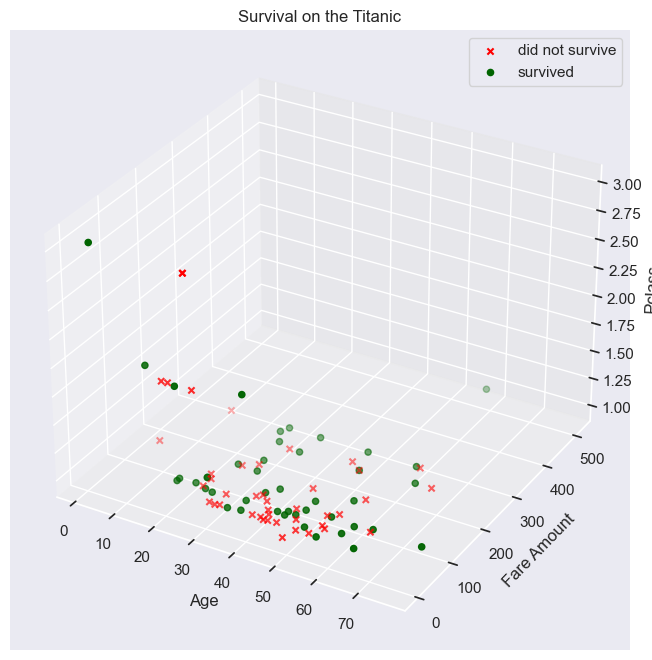

In [128]:

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score



sns.set_theme()

df= pd.read_csv(r"C:\Users\faith\inde 577\INDE577\577repo\Supervised Learning\Datasets\titanic.csv")
titanic= df.dropna()

age= titanic['Age']
fare= titanic['Fare']
pclass= titanic['Pclass']


fig= plt.figure(figsize=(8, 10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(titanic.loc[df['Survived']==0, 'Age'],
            titanic.loc[df['Survived']==0, 'Fare'],
            titanic.loc[df['Survived']==0, 'Pclass'],
            c='red', marker='x', label= "did not survive")


ax.scatter(titanic.loc[df['Survived']==1, 'Age'],
            titanic.loc[df['Survived']==1, 'Fare'],
            titanic.loc[df['Survived']==1, 'Pclass'],
            c='darkgreen', marker='o', label= "survived")

ax.set_xlabel('Age')
ax.set_ylabel('Fare Amount')
ax.set_zlabel('Pclass')
ax.set_title('Survival on the Titanic')

ax.legend()

plt.show()

Dropping all of the NaN data reduced the size of our data quite a bit. Notice that we only have a length of 87 datapoints now:

In [129]:
len(titanic)


87

Let's visualize the decision tree.

Accuracy: 0.6


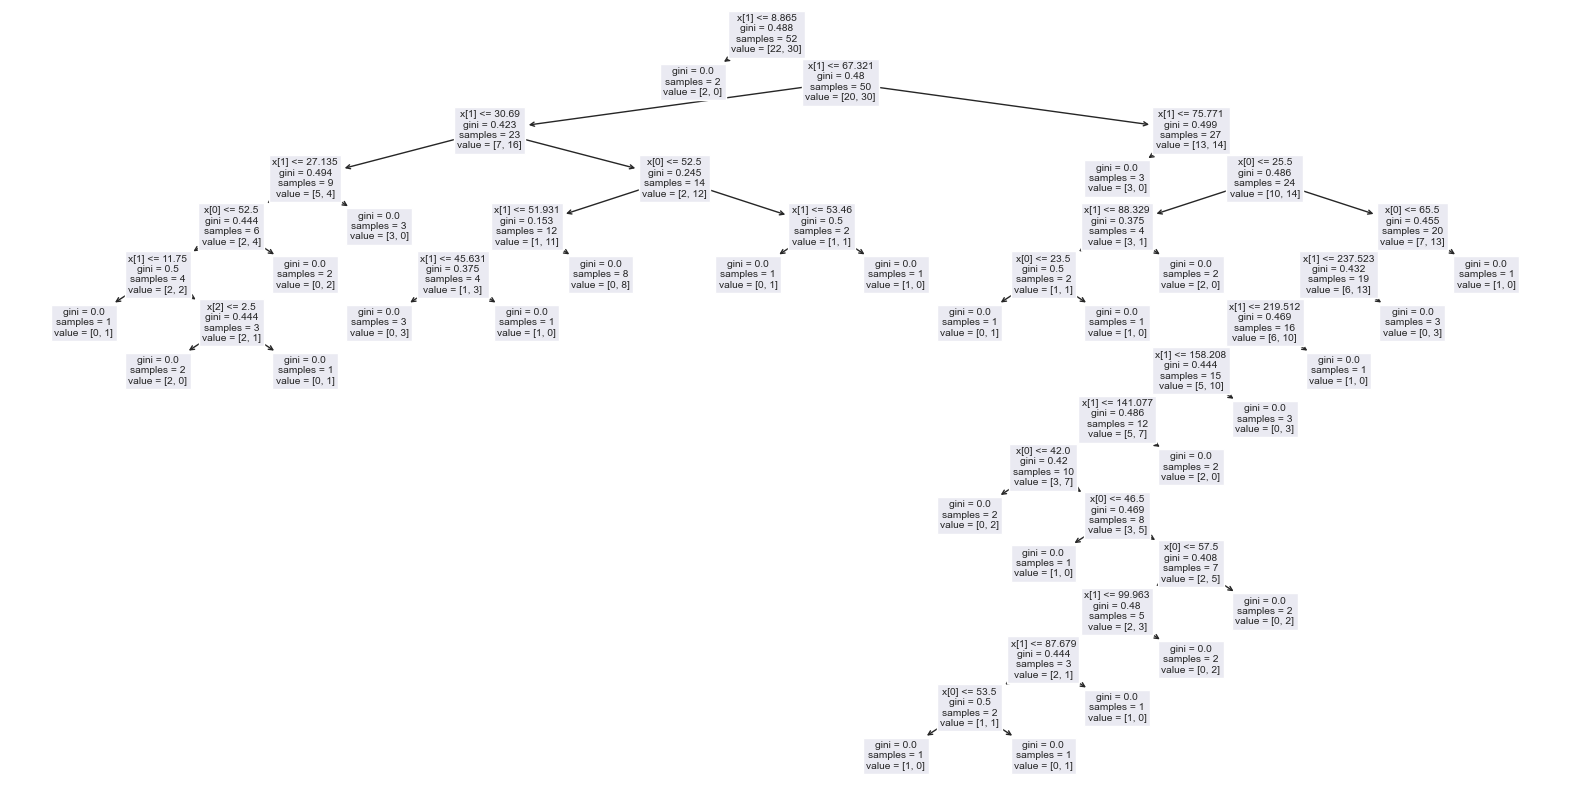

In [ ]:

X = titanic[['Age', 'Fare', 'Pclass']].values
X.reshape(-1,1)

y = titanic['Survived'].values
y = np.where(y == 1, 1, 0) #if you surived, return 1, else return 0
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y,
                                                    test_size = 0.4, 
                                                    random_state = 42)

dt = DecisionTreeClassifier(max_depth=15, random_state=42)
dt.fit(X_train, y_train)

plt.figure(figsize=(20, 10)) 
plot_tree(dt)


y_pred = dt.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Cool! Now let's visualize this data with just 2 of the features: age and fare amount.

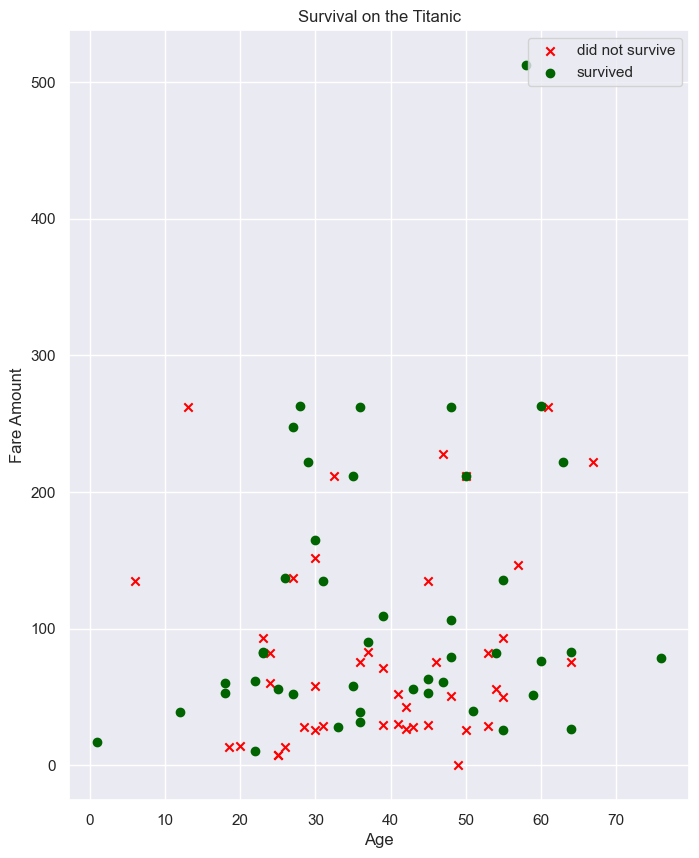

In [139]:
# Select features and target variable
fig= plt.figure(figsize=(8, 10))
plt.scatter(titanic.loc[df['Survived']==0, 'Age'],
            titanic.loc[df['Survived']==0, 'Fare'],
            c='red', marker='x', label= "did not survive")


plt.scatter(titanic.loc[df['Survived']==1, 'Age'],
            titanic.loc[df['Survived']==1, 'Fare'],
            c='darkgreen', marker='o', label= "survived")

plt.xlabel('Age')
plt.ylabel('Fare Amount')
plt.title('Survival on the Titanic')
plt.legend()
plt.show()

In [146]:

X = titanic[['Age', 'Fare']].values
X.reshape(-1,1)

y = titanic['Survived'].values
y = np.where(y == 1, 1, 0) #if you surived, return 1, else return 0
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y,
                                                    test_size = 0.4, 
                                                    random_state = 42)

dt = DecisionTreeClassifier(max_depth=15, random_state=42)
dt.fit(X_train, y_train)

#plt.figure(figsize=(20, 10)) 
#plot_tree(dt)


y_pred = dt.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.6285714285714286


Interestingly, our accuracy is slightly better with these 2 features!

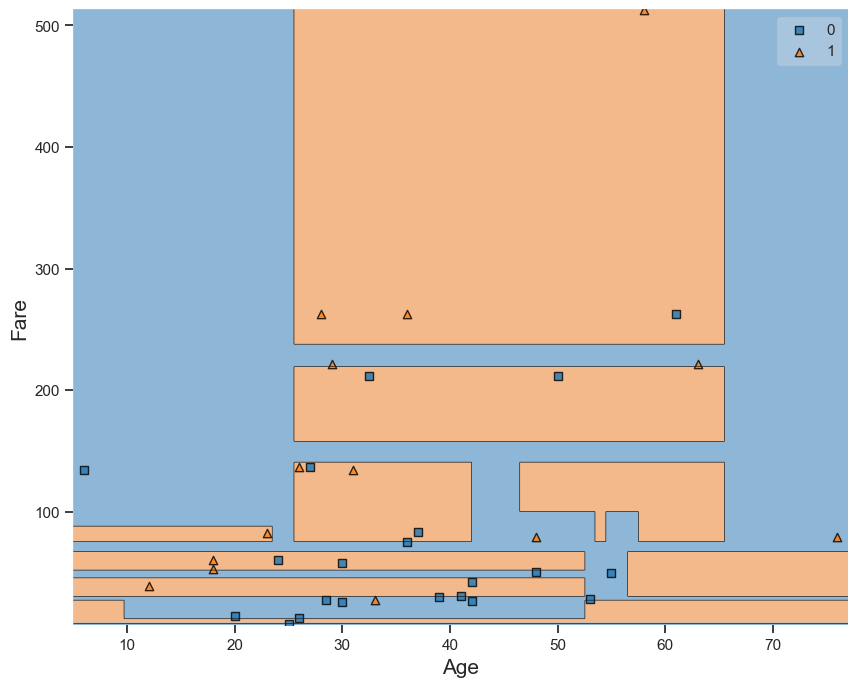

In [148]:
from mlxtend.plotting import plot_decision_regions

plt.figure(figsize = (10, 8))
plot_decision_regions(X_test, y_test, clf = dt)
plt.xlabel("Age", fontsize = 15)
plt.ylabel("Fare", fontsize = 15)
plt.grid()
plt.show()

Woah! That graphic is a bit messy. This is when we run into one of the big weaknesses of decision trees: overfitting!

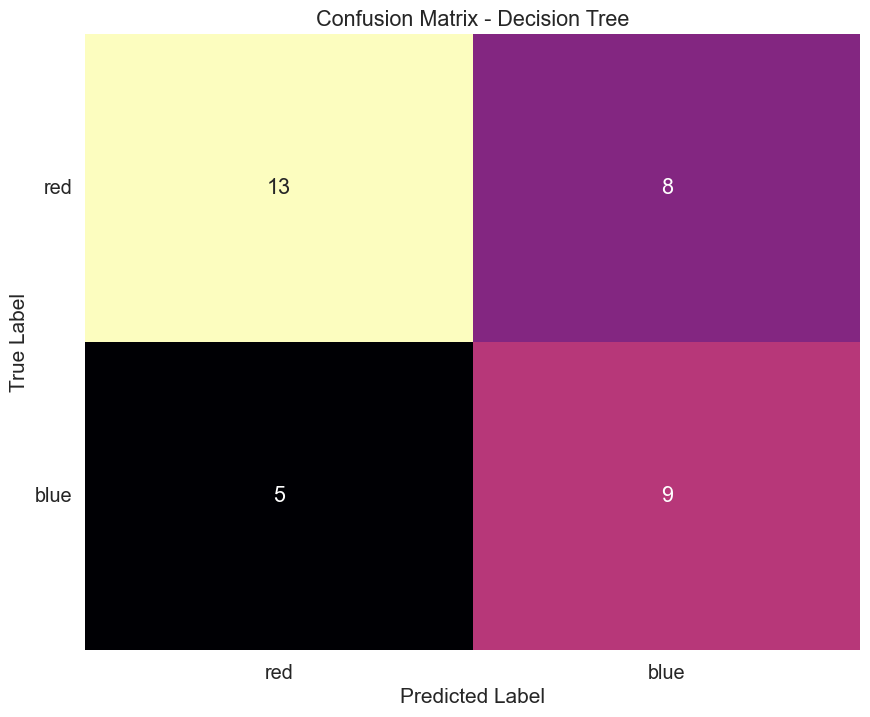

In [151]:
# Import metrics from sklearn 
from sklearn import metrics

# Note: visualizing your tree above will be weird after running seaborn
import seaborn as sns

# The confusion matrix
confusion_matrix = metrics.confusion_matrix(y_test, test_pred_decision_tree)

# Convert confusion matrix into dataframe
matrix_df = pd.DataFrame(confusion_matrix)


plt.figure(figsize=(10, 8))
ax = plt.axes()
sns.set(font_scale=1.3)

sns.heatmap(matrix_df,
            annot = True, 
            fmt = "g",
            ax = ax, 
            cmap = "magma", 
            cbar = False)

ax.set_title("Confusion Matrix - Decision Tree")
ax.set_xlabel("Predicted Label", fontsize=15)
ax.set_xticklabels(["red", "blue"])
ax.set_ylabel("True Label", fontsize=15)
ax.set_yticklabels(["red", "blue"], rotation=0)
plt.show()